<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

Load the Data and Libraries
---

In [3]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [5]:
data = pd.read_csv(r"C:\Users\Hritik Kounsal\Desktop\New folder (2)\bike_sharing_data.txt")
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [10]:
x=data["Population"]
y=data["Profit"]

 Visualize the Data
 ---
 

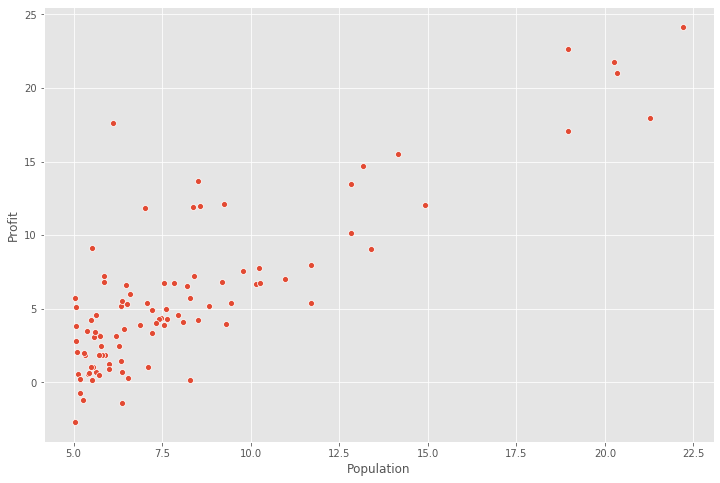

In [11]:
sns.scatterplot(x='Population', y="Profit", data=data);

Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [13]:
iterations = 1500;
alpha = 0.01;
x0 = np.ones(np.size(x))
X=np.array([x0,x]).T

SyntaxError: invalid syntax (<ipython-input-13-c151879e3fdd>, line 3)

In [14]:
def cost(X,y, theta=[[0],[0]]):
    m=y.size
    h=X.dot(theta)
    return (np.sum(np.square((h - y)))/(2 * m))

In [17]:
theta=np.array([0,0]) #weights
print ("The initial cost is" ,cost(X,y,theta))


The initial cost is 32.072733877455676


Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [18]:
def gradient(X,y,theta,alpha,iterations):
    cost_hist=np.zeros(iterations)
    for i in range(iterations):
        h = X.dot(theta)
        theta=theta-alpha*((X.T.dot(h-y))/y.size)
        cost_hist[i]=cost(X,y,theta)
    return theta,cost_hist


In [19]:
final_theta,history=gradient(X,y,theta,alpha,iterations)
print ("The optimized set of weights are",final_theta)

The optimized set of weights are [-3.63029144  1.16636235]


 Visualising the Cost Function $J(\theta)$
---

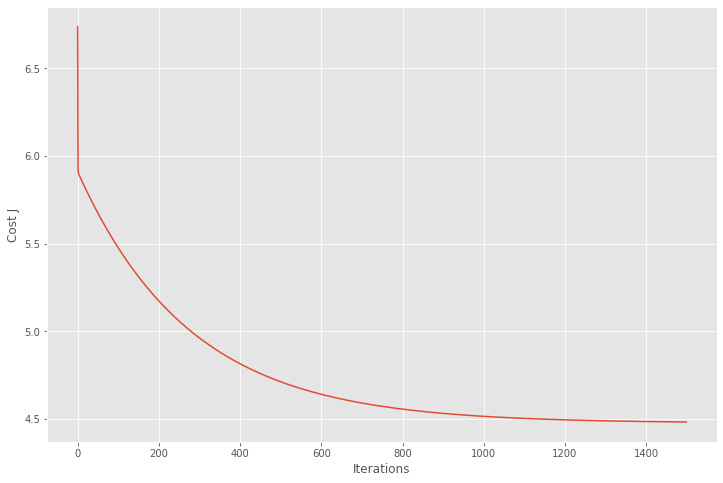

In [21]:
plt.plot(history)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

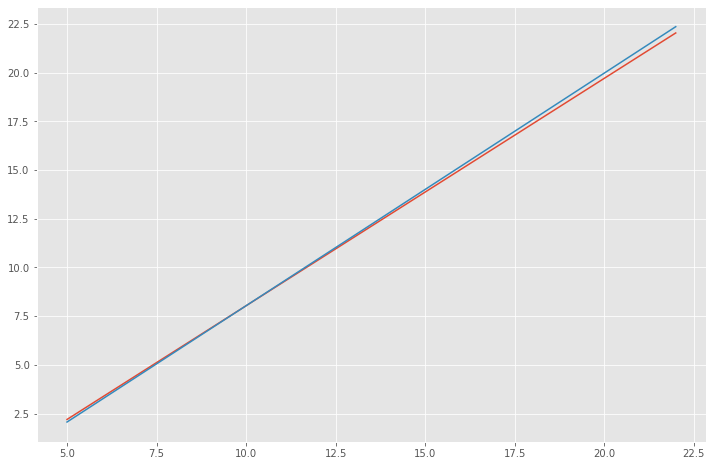

In [24]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
normal_x=np.arange(5,23)
pred_y=final_theta[0]+normal_x.dot(final_theta[1])
plt.plot(normal_x,pred_y,label="model form scratch")
plt.plot(normal_x, regr.intercept_+regr.coef_*normal_x, label='Linear regression (Scikit-learn GLM)')
plt.show()